In [2]:
from csv import DictReader
import collections
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import operator
import numpy as np

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

### Nesreče glede na spol

Procent moskih, ki so povzrocili nesreco: 0.6765211694373925 %
Procent žensk, ki so povzrocili nesreco: 0.3234788305626075 %


Text(0.5, 1.0, 'Števila nesreČ glede na spol povzročitelja')

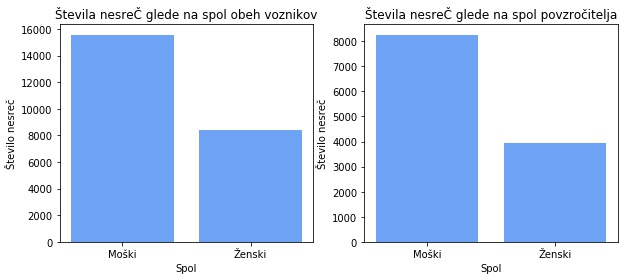

In [37]:
m, z = 0, 0
mP, zP = 0,0
m_z = []
mzP = []

for row in data:
    if(row["Spol"] == "MOSKI" and row["VrstaUdelezenca"] == 'VOZNIK OSEBNEGA AVTOMOBILA'):
        m += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ"):
            mP += 1
    elif (row["Spol"] == "ZENSKI" and row["VrstaUdelezenca"] == 'VOZNIK OSEBNEGA AVTOMOBILA'):
        z += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ"):
            zP += 1

m_z.append(m)
m_z.append(z)
mzP.append(mP)
mzP.append(zP)

print("Procent moskih, ki so povzrocili nesreco:", mP / (mP + zP), "%")
print("Procent žensk, ki so povzrocile nesreco:", zP / (mP + zP), "%")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(["Moški","Ženski"], m_z, color="#6ea2f5");
plt.xlabel("Spol")
plt.ylabel("Število nesreč")
plt.title("Števila nesreČ glede na spol obeh voznikov", fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(["Moški","Ženski"], mzP, color="#6ea2f5");
plt.xlabel("Spol")
plt.ylabel("Število nesreč")
plt.title("Števila nesreČ glede na spol povzročitelja", fontsize=12)

## Vremenske razmere

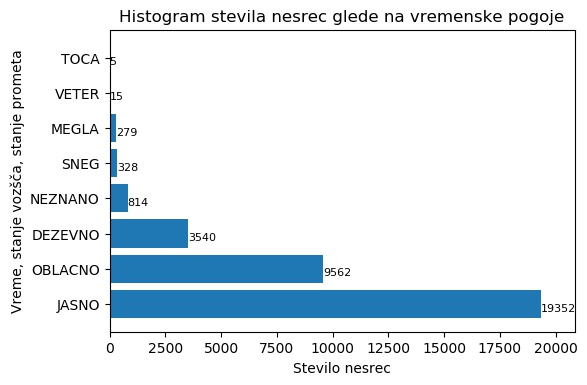

In [5]:
from collections import Counter 

st_nesrec_vreme = dict()
vsi_pogoji = ""

for row in data:
    vsi_pogoji += row["VremenskeOkoliscine"] + ", " + row["StanjeVozisca"]  + ", " + row["StanjePrometa"]
    if vsi_pogoji not in st_nesrec_vreme.keys():
        st_nesrec_vreme[vsi_pogoji] = 0
    st_nesrec_vreme[vsi_pogoji] += 1
    vsi_pogoji = ""

k = Counter(st_nesrec_vreme)  
high = k.most_common(10)

x = [i[0] for i in high]
y = [i[1] for i in high]

plt.figure(dpi = 100)
plt.barh(x, y);
plt.title('Histogram stevila nesrec glede na vremenske pogoje', fontsize=12);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Vreme, stanje vozšča, stanje prometa');
plt.xlim(0, y[0] + 1500)

for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)